In [1]:
# # Preamble

# ## Import colours

# In[1]:
# Lists of colors for plots

c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

ios_colors=[c5, c1, c3, c7, c2, c6, c4, c9, c8]

def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

color_list=list(map(to_rgb_frac, [(166,206,227),(178,223,138),(51,160,44),(31,120,180)]))

# Lists of colors for plots

def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

rb_div_5=list(map(to_rgb_frac, [(202,0,32),
(244,165,130),
(247,247,247),
(146,197,222),
(5,113,176)]))

qualitative_10=list(map(to_rgb_frac, [(166,206,227),
(31,120,180),
(178,223,138),
(51,160,44),
(251,154,153),
(227,26,28),
(253,191,111),
(255,127,0),
(202,178,214),
(106,61,154)]))


# <img src="Qualitative_10.png">
# <img src="RB_DIV_5.png">



# ## Import packages

# In[2]:

#from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# imported packages
get_ipython().run_line_magic('matplotlib', 'inline')
import datetime
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as plticker
import bisect
import copy
import json
import csv
import ast
import pylab as pl
import time
from scipy import integrate
from scipy.integrate import quad, dblquad
#import urllib2
#import io
#import os
#import re

# from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp1d
from scipy.special import expi
from sympy import DiracDelta
import time

#caroline's colour coding
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'
blue1 = '#08306b'
blue2 = '#08519c'
blue3 = '#2171b5'
blue4 = '#4292c6'
blue5 = '#6baed6'
blue6 = '#9ecae1'

# color_list = ['midnightblue', 'blue', 'royalblue', 'cornflowerblue', 'lightskyblue', 'powderblue']
# color_list = [blue1, blue2, blue3, blue4, blue5, blue6]
#color_list = [blue6, blue5, blue4, blue3, blue2, blue1]

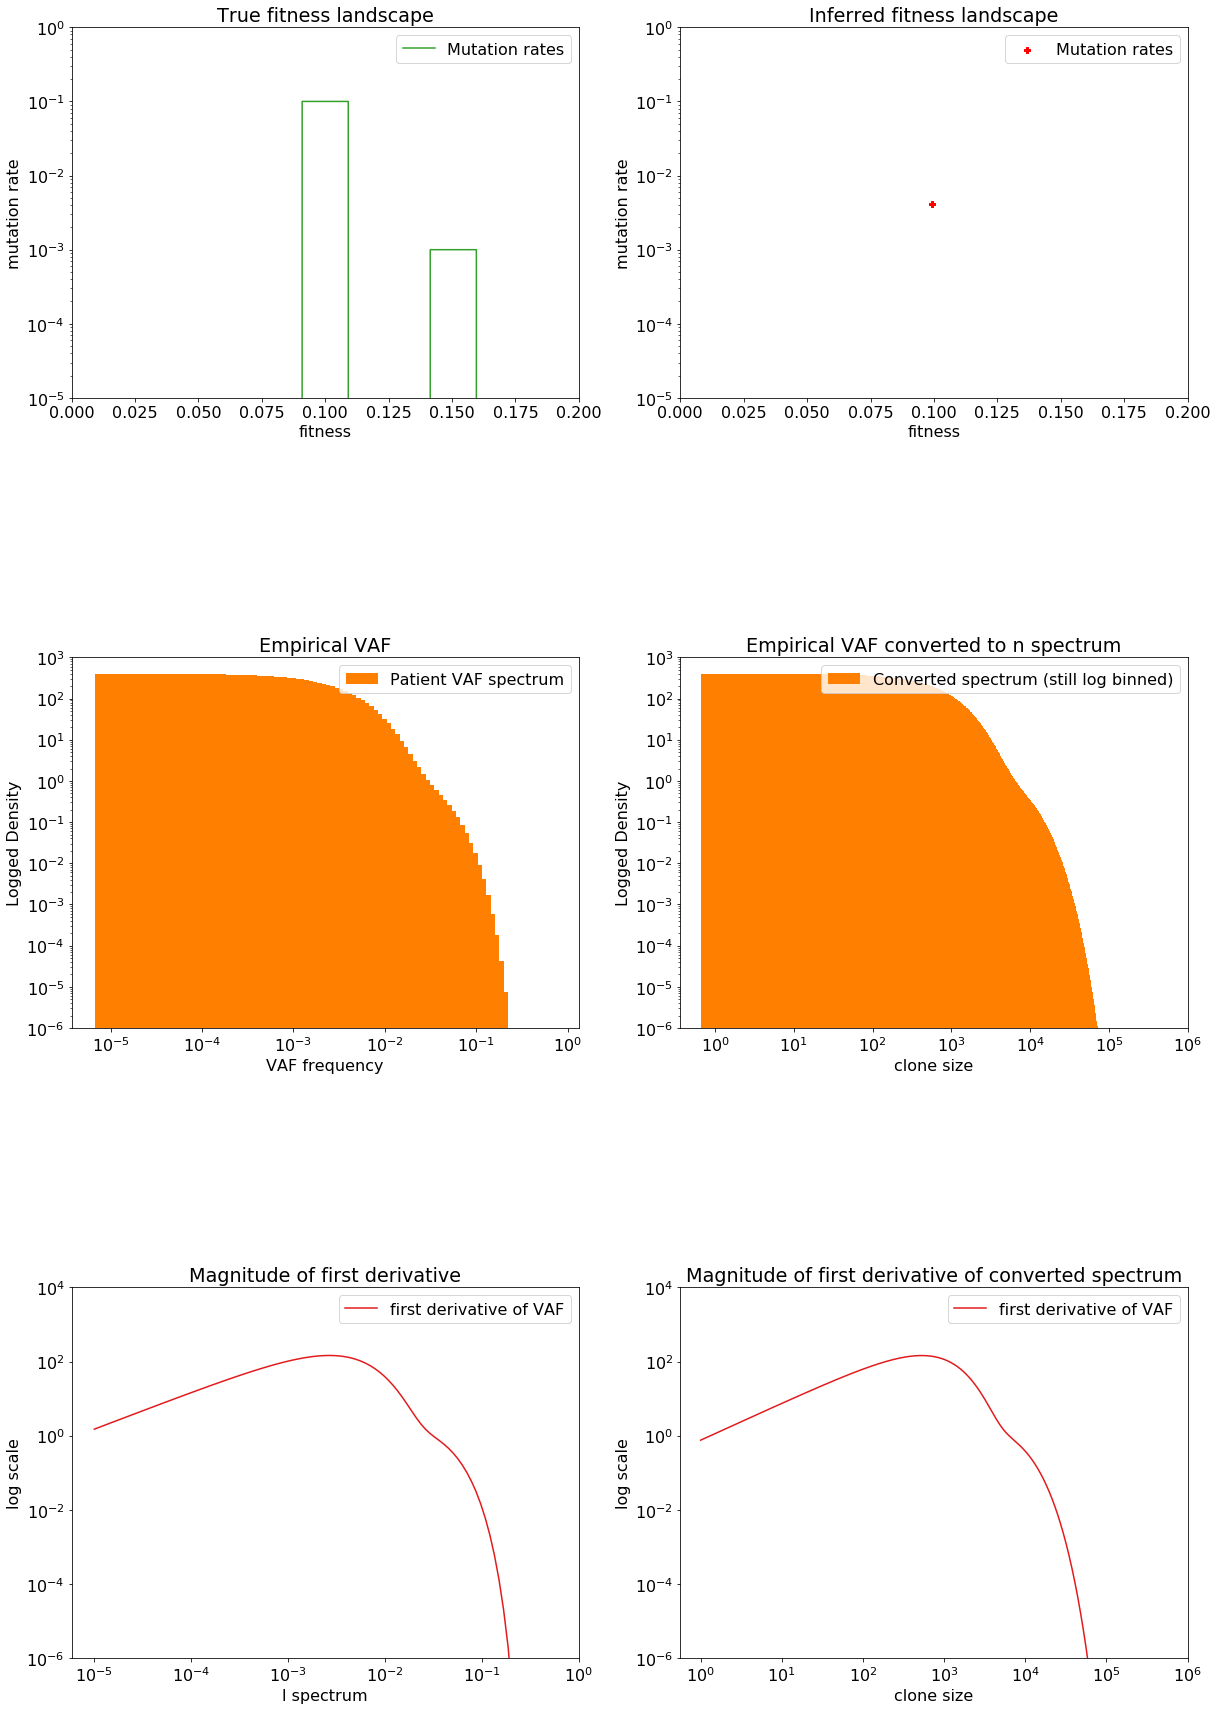

In [29]:
def derivative(a,h=10**-3):
    return ((Patient_VAF_spectrum(np.exp(a+h)))-(Patient_VAF_spectrum(np.exp(a))))/h

def derivative_converted(a,h=10**-3):
    return ((Infer_n_spectrum(np.exp(a+h)))-(Infer_n_spectrum(np.exp(a))))/h




plt.close('all')
f, ax1 = plt.subplots(3, 2, figsize=(10*2,15*2)) #width times height
plt.subplots_adjust(hspace = 0.7)  
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
VAF_lim=0.0009


#t_min=50
#t_max=80
t=40


from scipy import integrate
from scipy.integrate import quad


N=10**5
mu_1=10**-3
mu_2=10**-5
mu_lower=mu_1/100
mu_upper=1
s1=0.1
s2=0.15
s_min=0
s_max=0.2
s_range=np.linspace(s_min, s_max,100)
width=0.01    #cannot be too small as integration by sampling might miss the peak


def True_fitness_landscape(s):
    result=0
    if abs(s-s1)<width:
        result=mu_1/width
    elif abs(s-s2)<width:
        result=mu_2/width
    return result

fitness_landscape=[True_fitness_landscape(s) for s in s_range]
ax1[0][0].plot(s_range, fitness_landscape, color=qualitative_10[3], label='Mutation rates')
ax1[0][0].legend()
ax1[0][0].set_yscale('log')
ax1[0][0].set_xlabel('fitness')
ax1[0][0].set_ylabel('mutation rate')
ax1[0][0].set_title('True fitness landscape')
ax1[0][0].set_xlim(s_min,s_max)
ax1[0][0].set_ylim(mu_lower,mu_upper)
#ax1[0].set_xticks(major_ticks);                                                                                            
#ax1[0].set_xticklabels(major_tick_labels);


#returns l_spectrum (log binnning)
def Patient_VAF_spectrum(f): 
    n_tilde=lambda s: (np.exp(s*t)-1)/s
    f_spectrum= lambda s: (2*N/(1-2*f)/f)*np.exp(-(2*N*f/(1-2*f))/((np.exp(s*t)-1)/s))*True_fitness_landscape(s)
    result = integrate.quad(f_spectrum, s_min,s_max)[0]
    l_spectrum= result*f
    
    return l_spectrum

#removes artificial reduction near 50% VAF
def Infer_n_spectrum(n):
    f=n/(n+N)/2
    n_spectrum= ((1-2*f)**2/(2*N))*Patient_VAF_spectrum(f)/f*n     #((1-f)**2/N) from changing f to n;   still log binned
    return n_spectrum



logged_frequency=np.linspace(np.log(10**-5),np.log(0.499),100)
Empirical_data = [Patient_VAF_spectrum(np.exp(l)) for l in logged_frequency]

major_ticks = np.log(np.array([10**-k for k in range(6)]))                                         
major_tick_labels= ["$10^{%s}$" % -k for k in range(6)]


ax1[1][0].bar(logged_frequency, Empirical_data, color=qualitative_10[7], label='Patient VAF spectrum')
ax1[1][0].legend()
ax1[1][0].set_yscale('log')
ax1[1][0].set_xlabel('VAF frequency')
ax1[1][0].set_ylabel('Logged Density')
ax1[1][0].set_title('Empirical VAF')
ax1[1][0].set_ylim(10**-6,10**3)                                                
ax1[1][0].set_xticks(major_ticks);                                                                                            
ax1[1][0].set_xticklabels(major_tick_labels);

first_derivative_of_logVAF= [-derivative(l,h=10**-5) for l in logged_frequency]

ax1[2][0].plot(logged_frequency, first_derivative_of_logVAF, color=qualitative_10[5], label='first derivative of VAF')
ax1[2][0].legend()
ax1[2][0].set_yscale('log')
ax1[2][0].set_xlabel('l spectrum')
ax1[2][0].set_ylabel('log scale')
ax1[2][0].set_title('Magnitude of first derivative')
ax1[2][0].set_ylim(10**-6,10**4)    
#ax1[2].set_xlim(s_min,s_max)                                                
ax1[2][0].set_xticks(major_ticks);                                                                                            
ax1[2][0].set_xticklabels(major_tick_labels);



log_clone_size=np.linspace(np.log(1),np.log(1*N),10**3)
Empirical_data_converted_to_n=[Infer_n_spectrum(np.exp(exponent)) for exponent in log_clone_size]

major_ticks_for_n = np.log(np.array([10**k for k in range(7)]))                                         
major_tick_labels_for_n= ["$10^{%s}$" % k for k in range(7)]

ax1[1][1].bar(log_clone_size, Empirical_data_converted_to_n, color=qualitative_10[7], label='Converted spectrum (still log binned)')
ax1[1][1].legend()
ax1[1][1].set_yscale('log')
ax1[1][1].set_xlabel('clone size')
ax1[1][1].set_ylabel('Logged Density')
ax1[1][1].set_title('Empirical VAF converted to n spectrum')
ax1[1][1].set_ylim(10**-6,10**3)                                                
ax1[1][1].set_xticks(major_ticks_for_n);                                                                                            
ax1[1][1].set_xticklabels(major_tick_labels_for_n);


first_derivative_of_logVAF_converted= [-derivative_converted(l,h=10**-5) for l in log_clone_size]
ax1[2][1].plot(log_clone_size, first_derivative_of_logVAF_converted, color=qualitative_10[5], label='first derivative of VAF')
ax1[2][1].legend()
ax1[2][1].set_yscale('log')
ax1[2][1].set_xlabel('clone size')
ax1[2][1].set_ylabel('log scale')
ax1[2][1].set_title('Magnitude of first derivative of converted spectrum')
ax1[2][1].set_ylim(10**-6,10**4)                                              
ax1[2][1].set_xticks(major_ticks_for_n);                                                                                            
ax1[2][1].set_xticklabels(major_tick_labels_for_n);

from scipy.optimize import fsolve, fmin, fminbound
from scipy.signal import find_peaks

#find maximum in derivative graph
#l_max=fmin(lambda l: derivative_converted(l,h=10**-5),1)
#l_max=fminbound(lambda l: derivative_converted(l,h=10**-5),0,2)   #constrains f(x) values
peak_possible_position=np.linspace(0,20,1000)
peaks,_=find_peaks([-derivative_converted(l,h=10**-5) for l in peak_possible_position])  #give the indices of the peaks in the list\
                                                                                                        #peak_possible_position
l_max_list=[peak_possible_position[i] for i in peaks]
inferred_phi=[np.exp(l_max) for l_max in l_max_list]
#n_max=np.exp(l_max)
initial_guess=0.05
#func= lambda s: inferred_phi*s+1-np.exp(s*t)   #python doesn't do well
#func2= lambda s: np.log(inferred_phi*s+1)-s*t
inferred_s=[fsolve(lambda s: np.log(phi*s+1)-s*t, initial_guess) for phi in inferred_phi ]
#inferred_s.remove(inferred_s[2])

#One peak
inferred_mutation_rate=[Infer_n_spectrum(np.exp(l_max))/\
                        (N*np.exp(-1))\
                        for l_max in l_max_list]


#Two peaks
# l_star_1=l_max_list[0]
# l_star_2=l_max_list[1]
# LHS=np.array([[N*np.exp(-1),N*np.exp(-np.exp(l_star_1-l_star_2))],[N*np.exp(-np.exp(l_star_2-l_star_1)),N*np.exp(-1)]])
# RHS=np.array([Infer_n_spectrum(np.exp(l_star_1)),Infer_n_spectrum(np.exp(l_star_2))])
# inferred_mutation_rate=np.linalg.solve(LHS, RHS)





#ax1[0][1].plot([inferred_s], Inferred_fitness_landscape, label='Mutation rates'\
#               , marker='o', markersize=3, color="red")
ax1[0][1].scatter(inferred_s, inferred_mutation_rate, label='Mutation rates', color="red", marker='P')
ax1[0][1].legend()
ax1[0][1].set_yscale('log')
ax1[0][1].set_xlabel('fitness')
ax1[0][1].set_ylabel('mutation rate')
ax1[0][1].set_title('Inferred fitness landscape')
ax1[0][1].set_xlim(s_min,s_max)
ax1[0][1].set_ylim(mu_lower,mu_upper)

true_s_peaks=[s1,s2]
true_phi=[(np.exp(s*t)-1)/s for s in true_s_peaks]
plt.savefig('Inferring_fitness_const_s1_0.1_s2_0.15_u1_minus3_u2_minus5_wth_0.01.pdf', bbox_inches='tight')
#plt.savefig('Inferring_fitness_const_s_0.01_u_minus3__wth_0.01.pdf', bbox_inches='tight')

In [293]:
-derivative_converted(l_max,h=10**-4)/l_max*np.exp(l_max-np.exp(l_max)/((l_max*np.exp(l_max))/(1+l_max)))/(N/((l_max*np.exp(l_max))/(1+l_max)))

6.74214548372068e-09

In [359]:
inferred_mutation_rate=[Infer_n_spectrum(np.exp(l_max))/\
                        (N*np.exp(-1))\
                        for l_max in l_max_list]

 l_max

In [346]:
l_max=l_max_list[0]
(N/(np.exp(l_max))*np.exp(l_max-1))

36787.94411714424

In [27]:
inferred_mutation_rate

array([4.16413726e-03, 1.90915290e-14])

In [28]:
inferred_s


[array([0.0994196]), array([0.24513278])]

In [309]:
s=0.05
true_phi=(np.exp(s*t)-1)/s

In [12]:
l_max_list

[4.844844844844845, 7.867867867867868, 11.21121121121121]

In [257]:
len(peaks)

2

In [259]:
peaks

array([160, 359], dtype=int64)

In [13]:
np.log10(np.exp(l_max_list))

array([2.10408938, 3.4169716 , 4.86896716])

In [ ]:
np.log10(np.exp(np.linspace(0,20,1000)[peaks[0]]))